 For each question, explain why you chose the approach you did.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [ ]:
#year 6 = 2012, year 7 = 2014
#tvtot 0 no time at all ---> 7 more than 3 hours
#ppltrst 0 = can't be too careful, 10 = most people can be trusted
#pplfair 0 = most people take advantage of me, 10 = most people try to be fair
#happy = overally happiness, 0 = extremely unhappy, 10 = extremely happy
#sclmeet = how often you meet with friends, 1= never, 7 = every day
#sclact = social activities 1 = less than most, 5= more than most
#gndr 1= male, 2=female
#partner 1 = lives with partner, 2= no partner 

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [4]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.


In [7]:
country_groups = df.groupby(by='cntry')

CH 2012 vs 2014: Are people Trustworthy?
2012 mean trust score: 5.677878395860285
2014 mean trust score: 5.751617076326003
KruskalResult(statistic=0.3016359964448019, pvalue=0.5828586111442048)




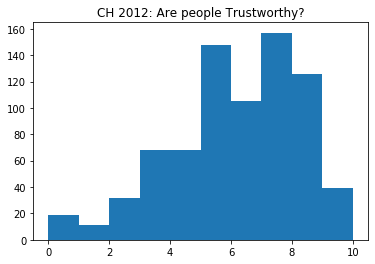

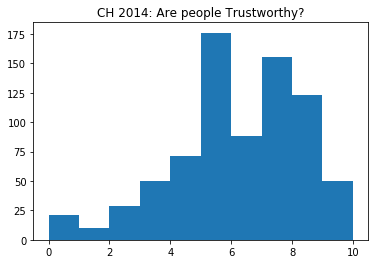

CZ 2012 vs 2014: Are people Trustworthy?
2012 mean trust score: 4.362519201228879
2014 mean trust score: 4.424657534246576
KruskalResult(statistic=0.7211591385301228, pvalue=0.39576395374563544)




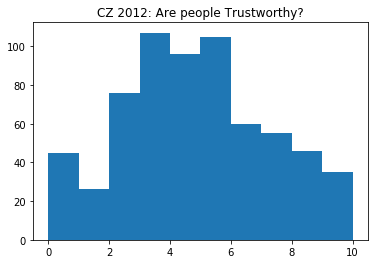

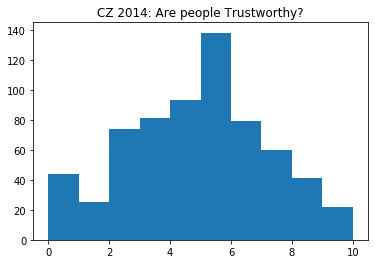

DE 2012 vs 2014: Are people Trustworthy?
2012 mean trust score: 5.214285714285714
2014 mean trust score: 5.357142857142857
KruskalResult(statistic=0.03493591039585809, pvalue=0.8517300191250199)




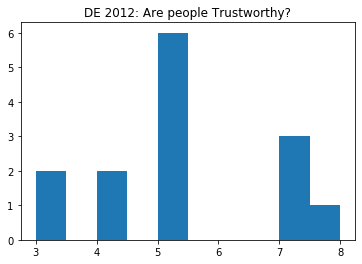

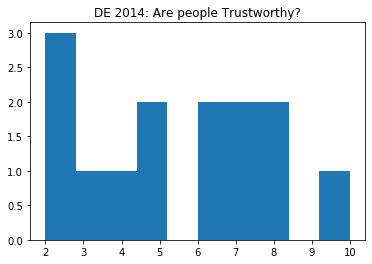

ES 2012 vs 2014: Are people Trustworthy?
2012 mean trust score: 5.114591920857379
2014 mean trust score: 4.895127993393889
KruskalResult(statistic=8.216087354735361, pvalue=0.0041520627675982)




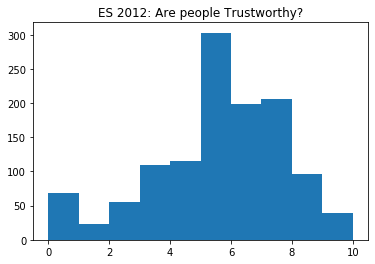

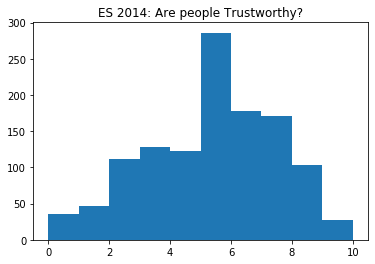

NO 2012 vs 2014: Are people Trustworthy?
2012 mean trust score: 6.64931506849315
2014 mean trust score: 6.598630136986301
KruskalResult(statistic=0.244738742531337, pvalue=0.6208043004969865)




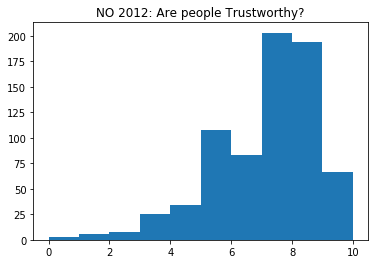

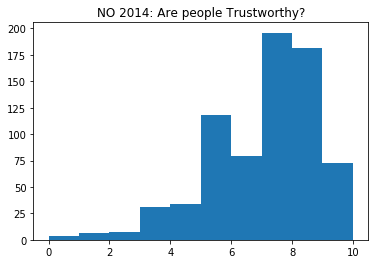

SE 2012 vs 2014: Are people Trustworthy?
2012 mean trust score: 6.058498896247241
2014 mean trust score: 6.257709251101321
KruskalResult(statistic=4.241254711044051, pvalue=0.03945299959307013)




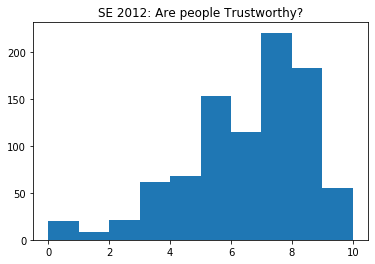

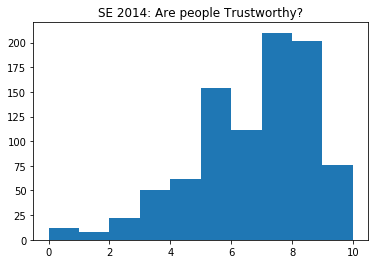

In [47]:
#splitting data into groups by unique country and year of interest
for code in df['cntry'].unique():
    country = country_groups.get_group(code)
    country_12 = country.loc[country['year'] == 6]
    country_14 = country.loc[country['year'] == 7]
    
    
    print(code+' 2012 vs 2014: Are people Trustworthy?')
    print('2012 mean trust score: ' +str(country_12['ppltrst'].mean()))
    print('2014 mean trust score: ' +str(country_14['ppltrst'].mean()))
    print(stats.kruskal(country_12['ppltrst'], country_14['ppltrst'], nan_policy='omit'))
    print('\n')

#examining distributions of each country by year    
    plt.hist(country_12['ppltrst'])
    plt.title(code+' 2012: Are people Trustworthy?')
    plt.show()

    plt.hist(country_14['ppltrst'])
    plt.title(code+' 2014: Are people Trustworthy?')
    plt.show()

For the above analysis the Kruskal-Wallis method was used because our data is non-parametric and we have multiple groups. The data is not continuous and instead is split into a limited number of groups ranging from 0 (people are untrustworthy) to 10 (most people can be trusted). From the histograms above we can see that this data was also not normally distributed, which supports our choice of using a non-parametric method. 

Using the Kruskal-Wallis method (and ommiting nan values) resulted in evidence that Spain (ES) and Sweden (SE) had meaningful differences between the year 2012 and 2014 because their p values were less than .05. This allowed us to reject the null hypothesis that there was no difference between these two years for the 'Are people trustworthy?' question that was asked to the people in our dataset. The remaining countries had p-values above .05 meaning that we could not reject the null hypothesis and it was more probable that the observed differences came were noise. 

Based on the mean values that were calculated for the two statistically significant countries which fell below a p-value of .05 we can say that Spain (ES) became less trustworth because the mean score dropped from 5.11 to 4.89 while Sweden (SE) became more trustworthy because their score rose from 6.05 to 6.25.

# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

CH 2012 vs 2014: Are you Happy?
2012 mean happy score: 8.088311688311688
2014 mean happy score: 8.116429495472186
KruskalResult(statistic=0.22331955287588717, pvalue=0.6365221432042547)




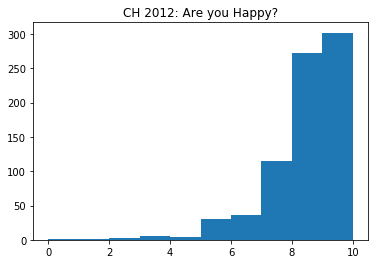

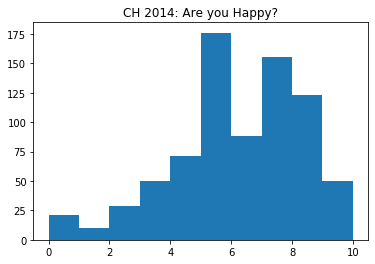

CZ 2012 vs 2014: Are you Happy?
2012 mean happy score: 6.7708978328173375
2014 mean happy score: 6.914110429447852
KruskalResult(statistic=1.4258218687180508, pvalue=0.23244752383800354)




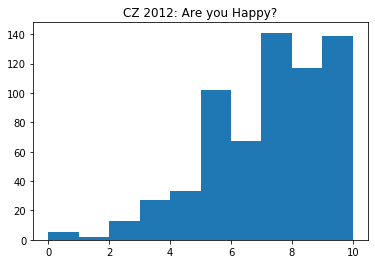

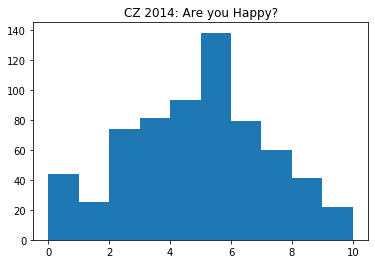

DE 2012 vs 2014: Are you Happy?
2012 mean happy score: 7.428571428571429
2014 mean happy score: 7.857142857142857
KruskalResult(statistic=0.39056749122656015, pvalue=0.532001255058662)




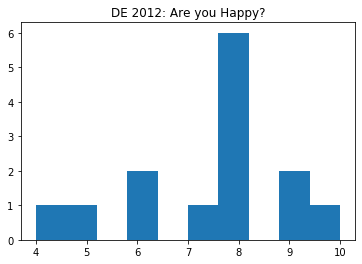

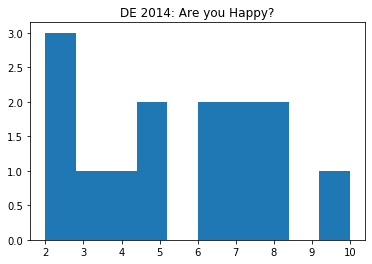

ES 2012 vs 2014: Are you Happy?
2012 mean happy score: 7.548679867986799
2014 mean happy score: 7.41996699669967
KruskalResult(statistic=4.089203641177268, pvalue=0.04315797189625085)




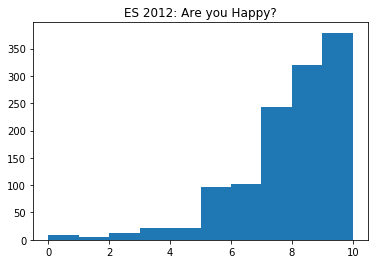

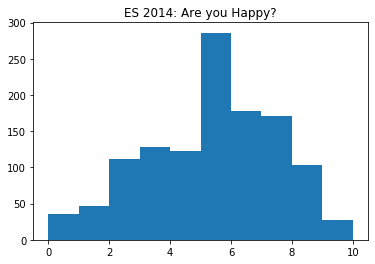

NO 2012 vs 2014: Are you Happy?
2012 mean happy score: 8.25171939477304
2014 mean happy score: 7.9151846785225715
KruskalResult(statistic=19.139561932891844, pvalue=1.215001301639077e-05)




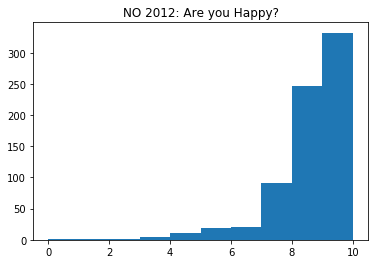

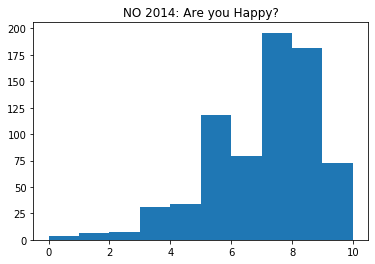

SE 2012 vs 2014: Are you Happy?
2012 mean happy score: 7.907386990077177
2014 mean happy score: 7.946961325966851
KruskalResult(statistic=0.05045734520052835, pvalue=0.8222693615371405)




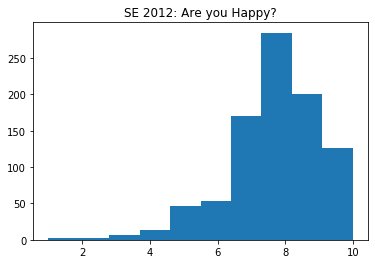

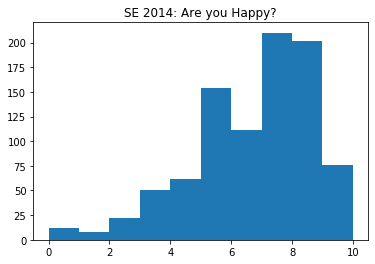

In [48]:
#splitting data into groups by unique country and year of interest
for code in df['cntry'].unique():
    country = country_groups.get_group(code)
    country_12 = country.loc[country['year'] == 6]
    country_14 = country.loc[country['year'] == 7]
    
    
    print(code+' 2012 vs 2014: Are you Happy?')
    print('2012 mean happy score: ' +str(country_12['happy'].mean()))
    print('2014 mean happy score: ' +str(country_14['happy'].mean()))
    print(stats.kruskal(country_12['happy'], country_14['happy'], nan_policy='omit'))
    print('\n')

#examining distributions of each country by year    
    plt.hist(country_12['happy'])
    plt.title(code+' 2012: Are you Happy?')
    plt.show()

    plt.hist(country_14['ppltrst'])
    plt.title(code+' 2014: Are you Happy?')
    plt.show()

For the above analysis the Kruskal-Wallis method was used because our data is non-parametric and we have multiple groups. The data is not continuous and instead is split into a limited number of groups ranging from 0 (extremely unhappy) to 10 (extremely happy). From the histograms above we can see that this data was also not normally distributed, which supports our choice of using a non-parametric method. 

Using the Kruskal-Wallis method (and ommiting nan values) resulted in evidence that Spain (ES) and Norway (NO) had statistically meaningful differences between the year 2012 and 2014 because their p values were less than .05. This allowed us to reject the null hypothesis that there was no difference between these two years for the 'Are you happy?' question that was asked to the people in our dataset. The remaining countries had p-values above .05 meaning that we could not reject the null hypothesis and it was more probable that the observed differences came were noise. 

Based on the mean values that were calculated for the two statistically significant countries which fell below a p-value of .05 we can say that both Spain (ES) and Norway (NO) became less happy because their mean happiness scores dropped from 7.54 to 7.41 and from 8.25 to 7.91 respectively. 

# Who reported watching more TV in 2012, men or women?

Total TV time?
Men 2012 mean total tv time: 3.901906090190609
Women 2012 mean total tv time: 3.944392523364486
KruskalResult(statistic=0.5766091020549451, pvalue=0.447644522500795)


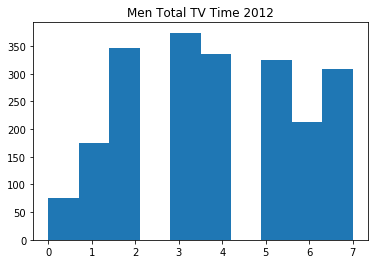

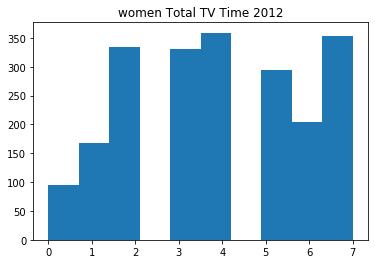

In [69]:
men_tv_12 = df.loc[(df['gndr'] == 1) & (df['year'] ==6)]['tvtot']
women_tv_12 = df.loc[(df['gndr'] == 2) & (df['year'] ==6)]['tvtot']

print('Total TV time?')
print('Men 2012 mean total tv time: '+str(men_tv_12.mean()))
print('Women 2012 mean total tv time: '+str(women_tv_12.mean()))
print(stats.kruskal(men_tv_12, women_tv_12, nan_policy='omit'))

plt.hist(men_tv_12)
plt.title('Men Total TV Time 2012')
plt.show()

plt.hist(women_tv_12)
plt.title('women Total TV Time 2012')
plt.show()

For the above analysis the Kruskal-Wallis method was used because our data is non-parametric and we have multiple groups. The data is not continuous and instead is split into a limited number of groups ranging from 0 (No tv time watched) to 7 (more than 3 hours per weekday). From the histograms above we can see that this data was also not normally distributed, which supports our choice of using a non-parametric method. 

Because our p-value was above .05 we cannot say with statistical significance that there was a meaningful difference between the amount of total TV time that men or women watched during a weekday. 

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?


Are people fair?
Partner 2012 mean fairness score: 6.063890473474045
No partner 2012 mean fairness score: 5.911280487804878
KruskalResult(statistic=13.798140191900169, pvalue=0.00020353761312822788)


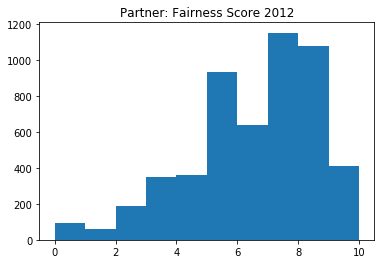

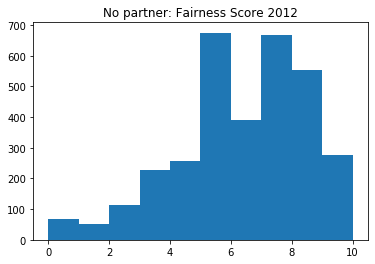

In [72]:
partner_12 = df.loc[df['partner'] == 1]['pplfair']
no_partner_12 = df.loc[df['partner'] ==2]['pplfair']

print('Are people fair?')
print('Partner 2012 mean fairness score: '+str(partner_12.mean()))
print('No partner 2012 mean fairness score: '+str(no_partner_12.mean()))
print(stats.kruskal(partner_12, no_partner_12, nan_policy='omit'))

plt.hist(partner_12)
plt.title('Partner: Fairness Score 2012')
plt.show()

plt.hist(no_partner_12)
plt.title('No partner: Fairness Score 2012')
plt.show()

For the above analysis the Kruskal-Wallis method was used because our data is non-parametric and we have multiple groups. The data is not continuous and instead is split into a limited number of groups ranging from 0 (Most people try to take advantage of me) to 10 (Most people try to be fair). From the histograms above we can see that this data was also not normally distributed, which supports our choice of using a non-parametric method. 

Using the Kruskal-Wallis method (and ommiting nan values) resulted in evidence that there was a statistically significant difference between whether people thought others were fair or not based on whether they did or did not have a partner because the p-value was below .05. This allowed us to reject the null hypothesis that there was no difference between these two groups in our dataset. 


Based on the 2012 data we can see that there was a statistically significant difference between the two groups we examined as can be seen by the mean fairness score of 6.06 for the partnered group and the mean fairness score of 5.91 for the unpartnered group. 

# Pick three of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

KruskalResult(statistic=8.438824385170868, pvalue=0.014707287016943316)


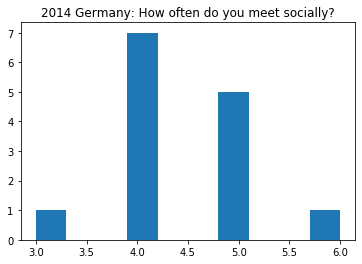

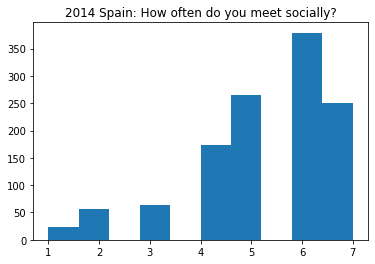

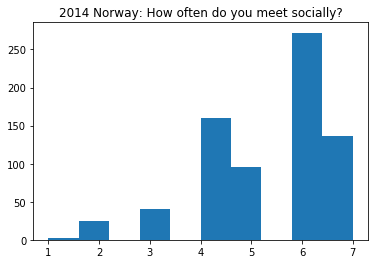

In [93]:
#selecting three countries
germany = df.loc[(df['cntry'] == 'DE') & (df['year'] == 7)]['sclmeet']
spain = df.loc[(df['cntry'] == 'ES') & (df['year'] == 7)]['sclmeet']
norway = df.loc[(df['cntry'] == 'NO') & (df['year'] == 7)]['sclmeet']

#checking for statistically meaningful differences
print(stats.kruskal(germany, spain, norway, nan_policy='omit'))

plt.hist(germany)
plt.title('2014 Germany: How often do you meet socially?')
plt.show()

plt.hist(spain)
plt.title('2014 Spain: How often do you meet socially?')
plt.show()

plt.hist(norway)
plt.title('2014 Norway: How often do you meet socially?')
plt.show()

In [94]:
#checking for statistically meaningful differences
print('Germany v Spain')
print(stats.kruskal(germany, spain, nan_policy='omit'))
print('\n')

print('Germany v Norway')
print(stats.kruskal(germany, norway, nan_policy='omit'))
print('\n')

print('Spain v Norway')
print(stats.kruskal(spain, norway, nan_policy='omit'))

Germany v Spain
KruskalResult(statistic=8.48853020112894, pvalue=0.0035739241736939867)


Germany v Norway
KruskalResult(statistic=8.22559970995718, pvalue=0.004130355409521695)


Spain v Norway
KruskalResult(statistic=0.004118258500640619, pvalue=0.9488319512783521)


For the above analysis the Kruskal-Wallis method was used because our data is non-parametric and we have multiple groups. The data is not continuous and instead is split into a limited number of groups ranging from 1 (Never meet socially with friends) to 7 (Meet socially every day). From the histograms above we can see that this data was also not normally distributed, which supports our choice of using a non-parametric method. 

In the first analysis based on the 2014 data we can see that there was a statistically significant difference between the three groups we examined because we have a p-value of .01 which falls below our threshold of .05. 

In the second analysis we run the test again limiting the method to comparing only two groups at a time. By running this analysis on each pair of values we are able to see that Germany is the one which stands out because when compared to the other countries it has a significant difference in both cases (p-value below .05) while the comparison of Spain v Norway is not statistically significant because its p-value is above .05.

# Pick three of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

KruskalResult(statistic=29.903892952336108, pvalue=3.209609166646052e-07)


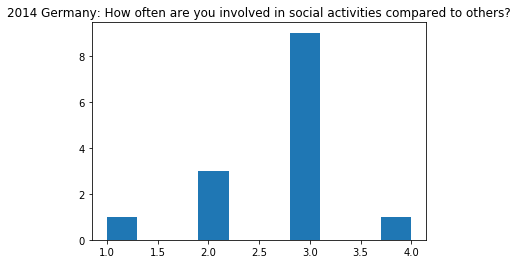

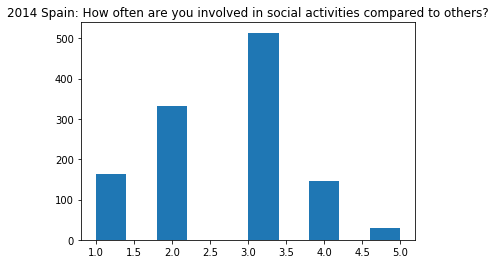

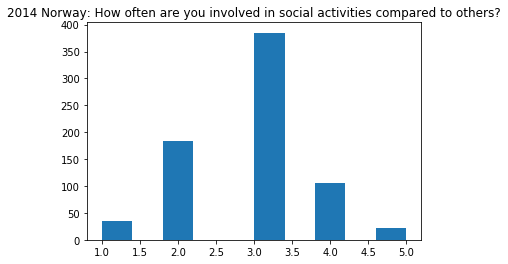

In [95]:
#selecting three countries
germany = df.loc[(df['cntry'] == 'DE') & (df['year'] == 7)]['sclact']
spain = df.loc[(df['cntry'] == 'ES') & (df['year'] == 7)]['sclact']
norway = df.loc[(df['cntry'] == 'NO') & (df['year'] == 7)]['sclact']

#checking for statistically meaningful differences
print(stats.kruskal(germany, spain, norway, nan_policy='omit'))

plt.hist(germany)
plt.title('2014 Germany: How often are you involved in social activities compared to others?')
plt.show()

plt.hist(spain)
plt.title('2014 Spain: How often are you involved in social activities compared to others?')
plt.show()

plt.hist(norway)
plt.title('2014 Norway: How often are you involved in social activities compared to others?')
plt.show()

In [96]:
#checking for statistically meaningful differences
print('Germany v Spain')
print(stats.kruskal(germany, spain, nan_policy='omit'))
print('\n')

print('Germany v Norway')
print(stats.kruskal(germany, norway, nan_policy='omit'))
print('\n')

print('Spain v Norway')
print(stats.kruskal(spain, norway, nan_policy='omit'))

Germany v Spain
KruskalResult(statistic=0.2651420550361215, pvalue=0.6066092985604079)


Germany v Norway
KruskalResult(statistic=0.2574908012485653, pvalue=0.6118492722105803)


Spain v Norway
KruskalResult(statistic=29.83367275340488, pvalue=4.707445342600102e-08)


For the above analysis the Kruskal-Wallis method was used because our data is non-parametric and we have multiple groups. The data is not continuous and instead is split into a limited number of groups ranging from 1 (Much less than most) to 5 (Much more than most). From the histograms above we can see that this data was also not normally distributed, which supports our choice of using a non-parametric method. 

In the first analysis based on the 2014 data we can see that there was a statistically significant difference between the three groups we examined because we have a p-value which falls below our threshold of .05. 

In the second analysis we run the test again limiting the method to comparing only two groups at a time. By running this analysis on each pair of values we are able to see that Spain and Norway differ from each other in this category. This is because the p-value for this comparison is below .05 while the other two comparisons are above .05.